q. rat in a maze  
q. https://www.geeksforgeeks.org/problems/rat-in-a-maze-problem/1  
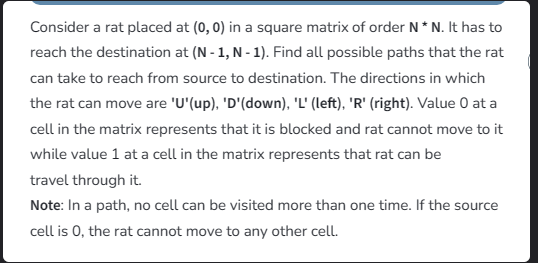

In [ ]:
void f(int r, int c, vector<string> &ans, string &tmp, vector<vector<int>> &ma, int &n, vector<pair<vector<int>,char>> &direc){
    if(r==n-1 and c==n-1){
        ans.push_back(tmp);
        return;
    }
    for(int i=0;i<direc.size();i++){
        int nextx=r+direc[i].first[0],nexty=c+direc[i].first[1];
        if(nextx>=n or nextx<0 or nexty>=n or nexty<0) continue;
        if(!ma[nextx][nexty]) continue;
        //move forward
        ma[nextx][nexty]=0;
        tmp.push_back(direc[i].second);

        //make next function call
        f(nextx,nexty,ans,tmp,ma,n,direc);

        //backtrack
        tmp.pop_back();
        ma[nextx][nexty]=1;
    }
}


vector<string> findPath(vector<vector<int>> &ma, int n) {
    vector<string> ans;
    string tmp;
    vector<pair<vector<int>,char>> direc={{{1,0},'D'},{{-1,0},'U'},{{0,1},'R'},{{0,-1},'L'}};
    if(ma[0][0]){
        ma[0][0]=0;
        f(0,0,ans,tmp,ma,n,direc);
    }   
    return ans;
}

https://leetcode.com/problems/unique-paths-iii/description/  
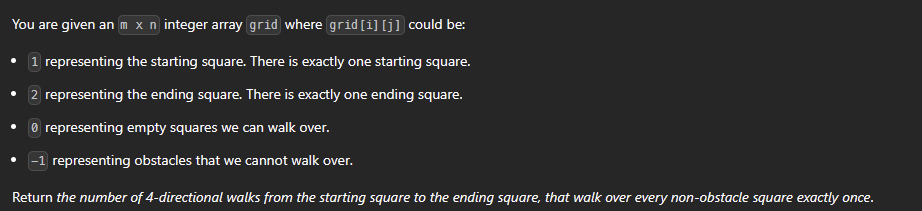

In [ ]:
void f(vector<vector<int>>& ma, int &ans, int i, int j,int rr, int cc, vector<vector<ll>> &dir, int cnt){
    if(i<0 or i>=rr or j<0 or j>=cc or ma[i][j]==-1) return;
    if(ma[i][j]==2 and cnt==0){
        ans++;
        return;
    }
    if(ma[i][j]==2 or cnt==0) return;
    //moving forward
    cnt--;
    int orig = ma[i][j];
    ma[i][j]=-1;

    //new function call
    for(auto v:dir) f(ma,ans,i+v[0],j+v[1],rr,cc,dir,cnt);

    //backtracking
    ma[i][j]=orig;
    cnt++;
}

int uniquePathsIII(vector<vector<int>>& ma) {
    int ans=0,rr=ma.size(),cc=ma[0].size();
    int ii,ij;
    int cnt=1;
    for(int i=0;i<rr;i++)
        for(int j=0;j<cc;j++)
            {
                if(ma[i][j]==1)
                {
                    ii=i;
                    ij=j;
                }

                if(ma[i][j]==0) cnt++;
            }

    vector<vector<ll>> dir={{1,0},{-1,0},{0,1},{0,-1}};
    f(ma,ans,ii,ij,rr,cc,dir,cnt);
    return ans;
}